## Импорт зависимостей

In [23]:
import os
import sys
from transformers import pipeline
from PIL import Image
import torch

import torchvision.transforms as transforms

## Загрузка модели

In [16]:
pipe = pipeline("image-classification", model="dima806/farm_insects_image_detection")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


## Определение пути, содержащего папки с примерами изображений для классификации

In [29]:
# Путь к корневой папке датасета
DATASET_DIR = "farm_insects"

## Проверка модели на примерах

In [ ]:
total = 0
correct = 0

results = []  # сохраним все результаты здесь

# Получаем названия классов насекомых (папок)
classes = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]

for class_name in classes:
    class_dir = os.path.join(DATASET_DIR, class_name)

    for filename in os.listdir(class_dir):
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue  # пропуск системных файлов

        image_path = os.path.join(class_dir, filename)

        # Загружаем изображение
        try:
            img = Image.open(image_path)
        except:
            print("Ошибка чтения файла:", image_path)
            continue

        # Предсказание
        preds = pipe(img)

        # Берём топ-1 значение по вероятности принадлжежности к классу
        pred_label = preds[0]["label"]

        # true label = имя папки (оно же класс)
        true_label = class_name

        is_correct = (pred_label == true_label)

        results.append({
            "file": image_path,
            "true": true_label,
            "pred": pred_label,
            "correct": is_correct
        })

        total += 1
        correct += int(is_correct)

        print(f"{image_path} → pred: {pred_label}, true: {true_label}, correct: {is_correct}")

# Итоговая метрика
accuracy = correct / total if total > 0 else 0
print("\n======================")
print(f"Число проверенных изображений: {total}")
print(f"Класс определен корректно: {correct}")
print(f"Точность: {accuracy:.4f}")
print("======================")

farm_insects/Tomato Hornworms/Image_2.jpg → pred: Tomato Hornworms, true: Tomato Hornworms, correct: True
farm_insects/Tomato Hornworms/Image_3.jpg → pred: Tomato Hornworms, true: Tomato Hornworms, correct: True
farm_insects/Tomato Hornworms/Image_1.jpg → pred: Tomato Hornworms, true: Tomato Hornworms, correct: True
farm_insects/Tomato Hornworms/Image_4.jpg → pred: Tomato Hornworms, true: Tomato Hornworms, correct: True
farm_insects/Tomato Hornworms/Image_5.jpg → pred: Tomato Hornworms, true: Tomato Hornworms, correct: True
farm_insects/Corn Earworms/Image_2.jpg → pred: Corn Earworms, true: Corn Earworms, correct: True
farm_insects/Corn Earworms/Image_3.jpg → pred: Corn Earworms, true: Corn Earworms, correct: True
farm_insects/Corn Earworms/Image_1.jpg → pred: Corn Earworms, true: Corn Earworms, correct: True
farm_insects/Corn Earworms/Image_4.jpg → pred: Corn Earworms, true: Corn Earworms, correct: True
farm_insects/Corn Earworms/Image_5.jpg → pred: Corn Borers, true: Corn Earworms, c

## Демонстрация работы модели на конкретном примере

In [64]:
example_image_path = 'farm_insects/Armyworms/Image_5.jpg'

In [65]:
img = Image.open(example_image_path)

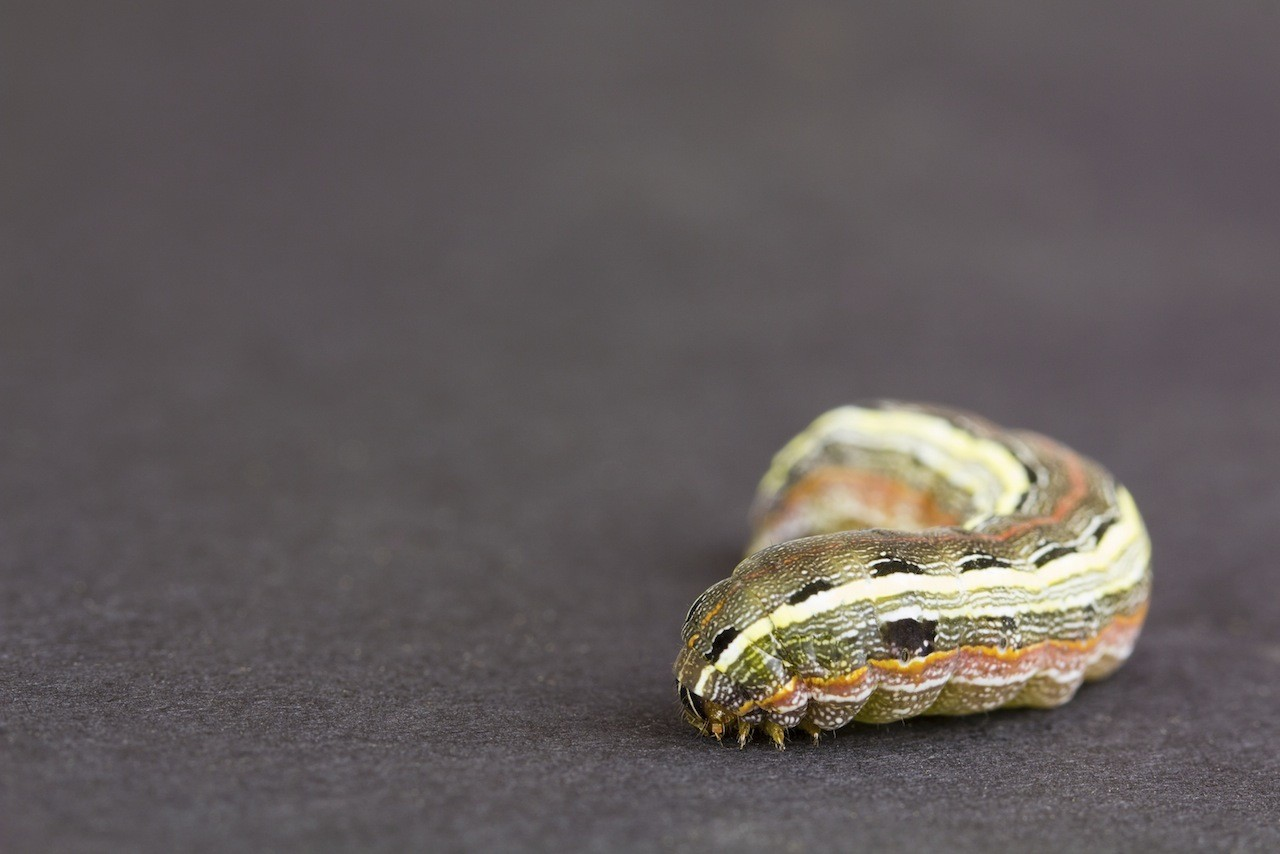

In [66]:
img

In [67]:
# Предсказание
preds = pipe(img)

# Берём топ-1
pred_label = preds[0]["label"]

In [68]:
pred_label

'Armyworms'

Предсказанный класс совпадает с фактическим